In [1]:
import ble2lsl
from ble2lsl.devices import muse2016
from wizardhat import acquire, plot, transform

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
device = muse2016
dummy_outlet = ble2lsl.Dummy(device)
receiver = acquire.Receiver()

Using source with ID Dummy-OuterSpace


In [19]:
lo_cut = 20
hi_cut = None

Create a `Filter` object and pass the coefficients

In [20]:
filter = transform.Bandpass(receiver.buffers['EEG'],lo_cut,hi_cut)

First, let's visualize the raw signal and the filtered signal. Let's grab some samples from the `buffer_in` and the `buffer_out` of the `filter` object...

In [21]:
channel_to_view = 'TP9'
samples_to_view = 2000
raw = filter.buffer_in.data[channel_to_view][-samples_to_view:-1]
time_raw = filter.buffer_in.get_timestamps()[-samples_to_view:-1]
filt = filter.buffer_out.data[channel_to_view][-samples_to_view:-1]
time_filt = filter.buffer_out.get_timestamps()[-samples_to_view:-1]

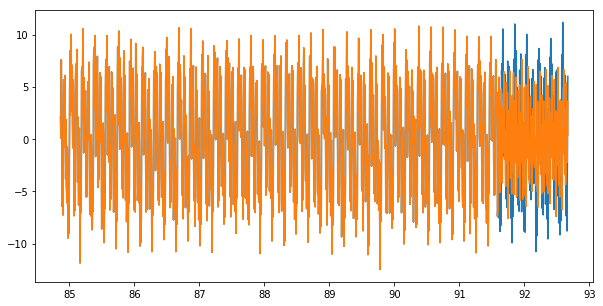

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time_raw,raw,label='raw')
ax.plot(time_filt,filt,label='filtered')

Create pre- and post-filter `PSD` objects

In [23]:
pre_filter = transform.PSD(receiver.buffers['EEG'])
post_filter = transform.PSD(filter.buffer_out)

In [24]:
# timestamp of most recent psd
channel_to_view = 'TP9'
timestamp_to_view = pre_filter.buffer_out.get_timestamps(1)

# grab psd pre- and post-filter
pre_filter_data = pre_filter.buffer_out.data[['time',channel_to_view]]
pre_filter_psd = pre_filter_data[pre_filter_data['time']==timestamp_to_view]

post_filter_data = post_filter.buffer_out.data[['time',channel_to_view]]
post_filter_psd = post_filter_data[post_filter_data['time']==timestamp_to_view]

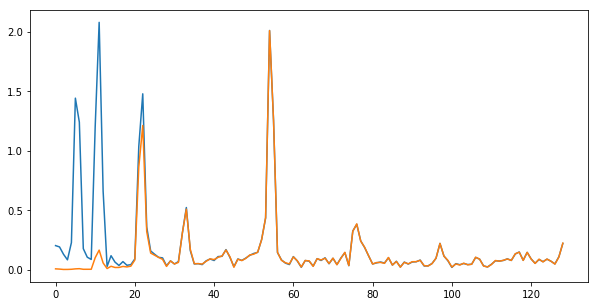

In [25]:
# plot both
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(0,129),pre_filter_psd[channel_to_view].T)
ax.plot(np.arange(0,129),post_filter_psd[channel_to_view].T)